# Volume 3: K-Means Clustering.
    Daniel Perkins
    MATH 403
    10/3/24

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn import cluster
from matplotlib import pyplot as plt
from PIL import Image
import glob
%matplotlib inline

In [2]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$-th entry indicates which cluster center the $i$-th row of $X$ is closest to.

4. `plot()`: Accept an $l \times n$ matrix $X$ of $l$ data points and an array $y$ of $l$ integers representing the labels.
Plot each data point from the matrix, colored by cluster, along with the cluster centers.
Note that in this case, $n = 2$.

Test your class on the iris data set with $k=3$ (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data and cluster centers, coloring the data by cluster.

In [4]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.normalize = normalize        # This is for Problem 3.
        self.p = p   # Order of norm to use
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        # Choose k random rows as the initial cluster centers
        cluster_centers = X[np.random.choice(np.shape(X)[0], self.n_clusters, replace=False)]
        # Stores points that correspond to each cluster center
        cluster_to_point = {i: [] for i in range(self.n_clusters)}  
        
        # Run K-Means algorithm
        for iter in range(self.max_iter):
            old_cluster_centers = np.copy(cluster_centers)
            # Find which clusters each point belongs to
            for i in range(len(X)):
                distances = [np.linalg.norm(X[i] - center, ord=self.p) for center in cluster_centers]
                closest = np.argmin(distances)
                cluster_to_point[closest].append(X[i])
            # Recompute cluster centers
            for i in range(self.n_clusters):
                points = np.array(cluster_to_point[i])
                center = np.mean(points, axis=0)
                if self.normalize:  # May need to normalize
                    center = center / np.linalg.norm(center, ord=self.p)
                cluster_centers[i] = center
            # If the change was minimal, stop now
            if np.linalg.norm(cluster_centers - old_cluster_centers, ord=self.p) < self.tol: 
                break
            
        self.cluster_centers = cluster_centers
        
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        point_to_cluster = []
        # Find which clusters each point belongs to
        for i in range(len(X)):
            distances = [np.linalg.norm(X[i] - center, ord=self.p) for center in self.cluster_centers]
            closest = np.argmin(distances)
            point_to_cluster.append(closest) # Store in list
        return point_to_cluster

    
    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, X, y):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        plt.title("Clustering of the data")
        classes = set(y)
        for the_class in classes:
            indices = np.where(y==the_class)  # Find indices of each class
            x_data = X[indices]  # Get just the data that corresponds to that class
            plt.scatter(x_data[:,0], x_data[:,1], label=f"Class {the_class}", s=2)
        plt.scatter(self.cluster_centers[:,0], self.cluster_centers[:,1], s=40, label="Cluster Centers")
        plt.show()

[4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 2, 6, 2, 1, 2, 6, 2, 3, 2, 1, 3, 6, 1, 6, 1, 2, 6, 1, 6, 1, 2, 6, 2, 6, 6, 6, 2, 2, 6, 3, 1, 3, 1, 2, 6, 6, 2, 6, 1, 1, 1, 6, 1, 3, 1, 6, 6, 6, 3, 1, 7, 2, 0, 7, 7, 0, 1, 0, 7, 0, 7, 2, 7, 2, 2, 7, 7, 0, 0, 2, 7, 2, 0, 2, 7, 0, 2, 2, 7, 0, 0, 0, 7, 2, 2, 0, 7, 7, 2, 7, 7, 7, 2, 7, 7, 7, 2, 7, 7, 2]


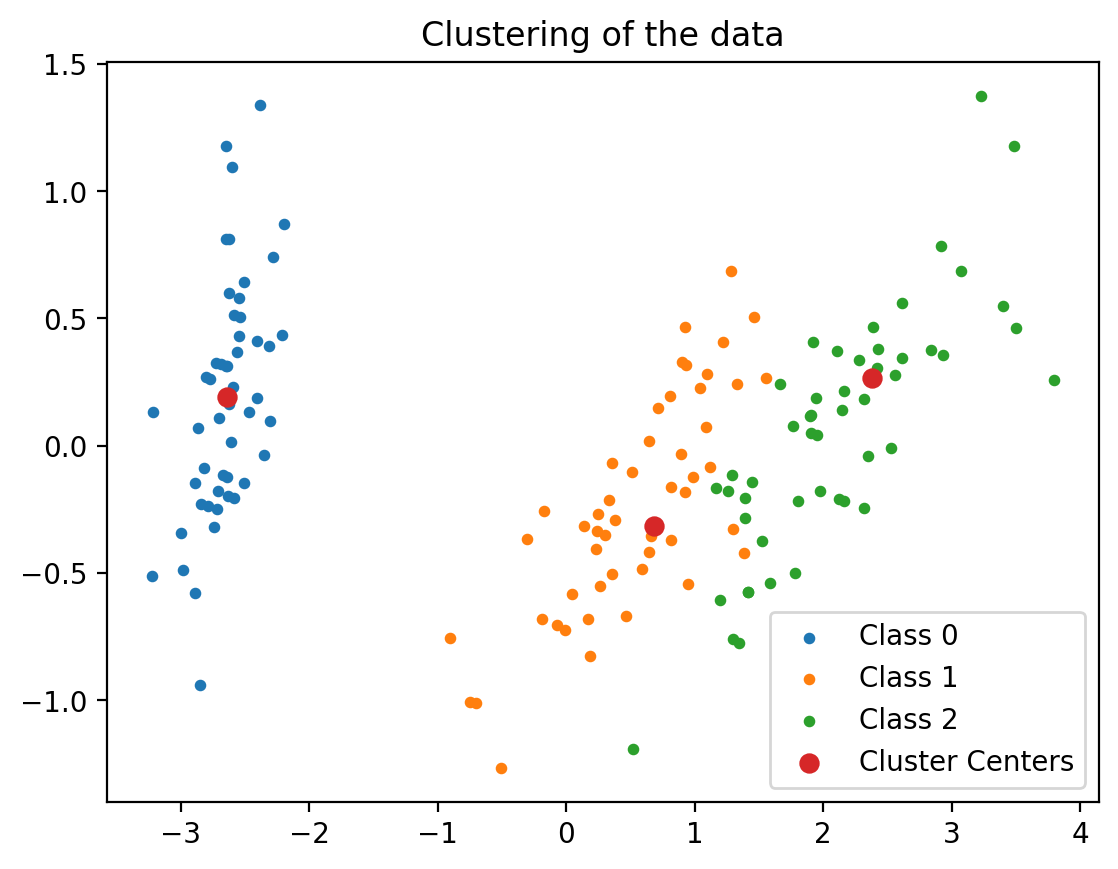

In [92]:
# Load in data
iris = load_iris()
X = iris.data
y = iris.target

# Test fit and preciction
model = KMeans()
print(model.fit_predict(X))

# Reduce dimension of data
pca = PCA(n_components=2)
X_hat = pca.fit_transform(X)

# Plot function
model = KMeans(n_clusters=3)
model.fit(X_hat)
model.plot(X_hat, y)

## Problem 2
Using the Methods you wrote in Problem 1, add a parameter, $p$, to your class that denotes the norm and defaults to 2.
Save $p$ as an attribute to be used in your `fit()` and `predict()` functions.

Using the latitude and longitude data in $\text{sacramento.npy}$ find the optimal placement for 12 fire stations. 
Plot the longitude and latitude data points colored by cluster as well as the cluster centers.
Make plots for 3 different values for $p$ to find the optimal locations for the fire stations.
In a Markdown cell, report which norm you found to be the best at keeping the maximum distance small.

----------------------p=1----------------------


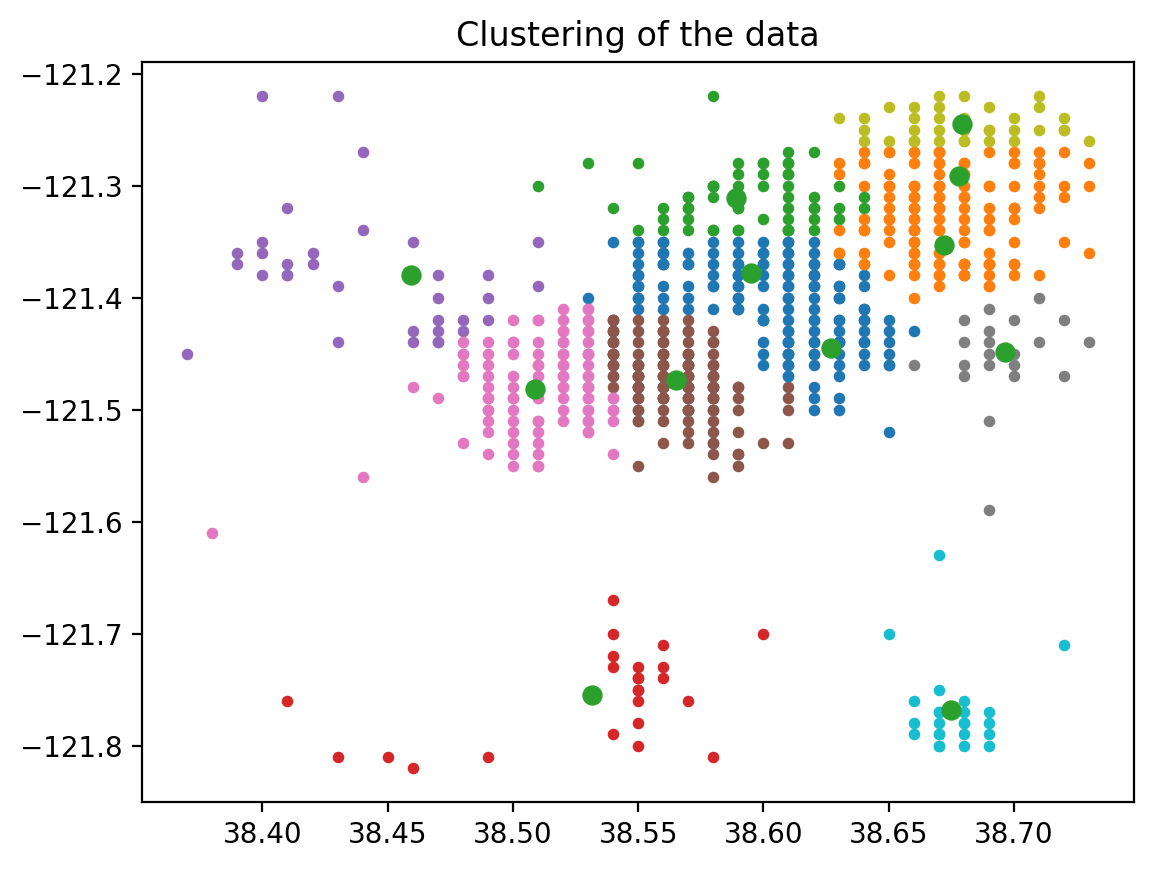

----------------------p=2----------------------


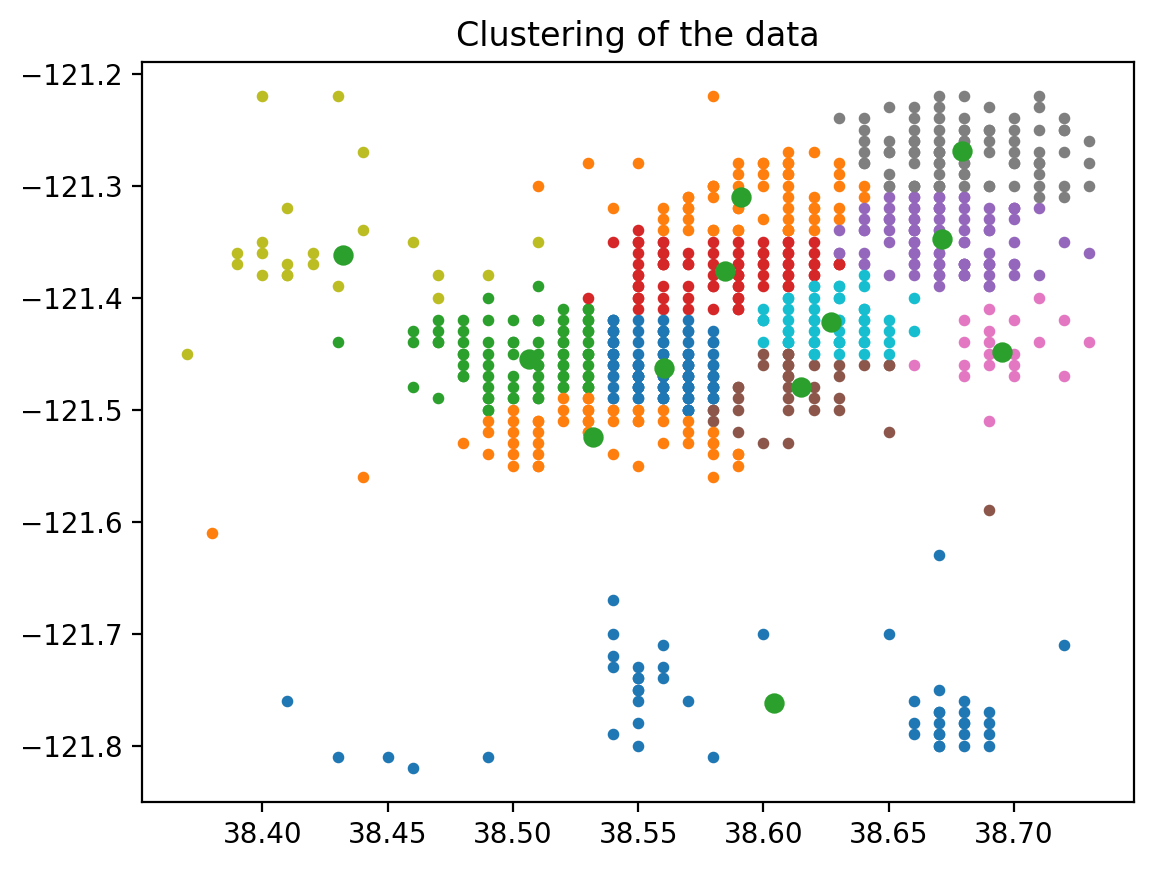

----------------------p=inf----------------------


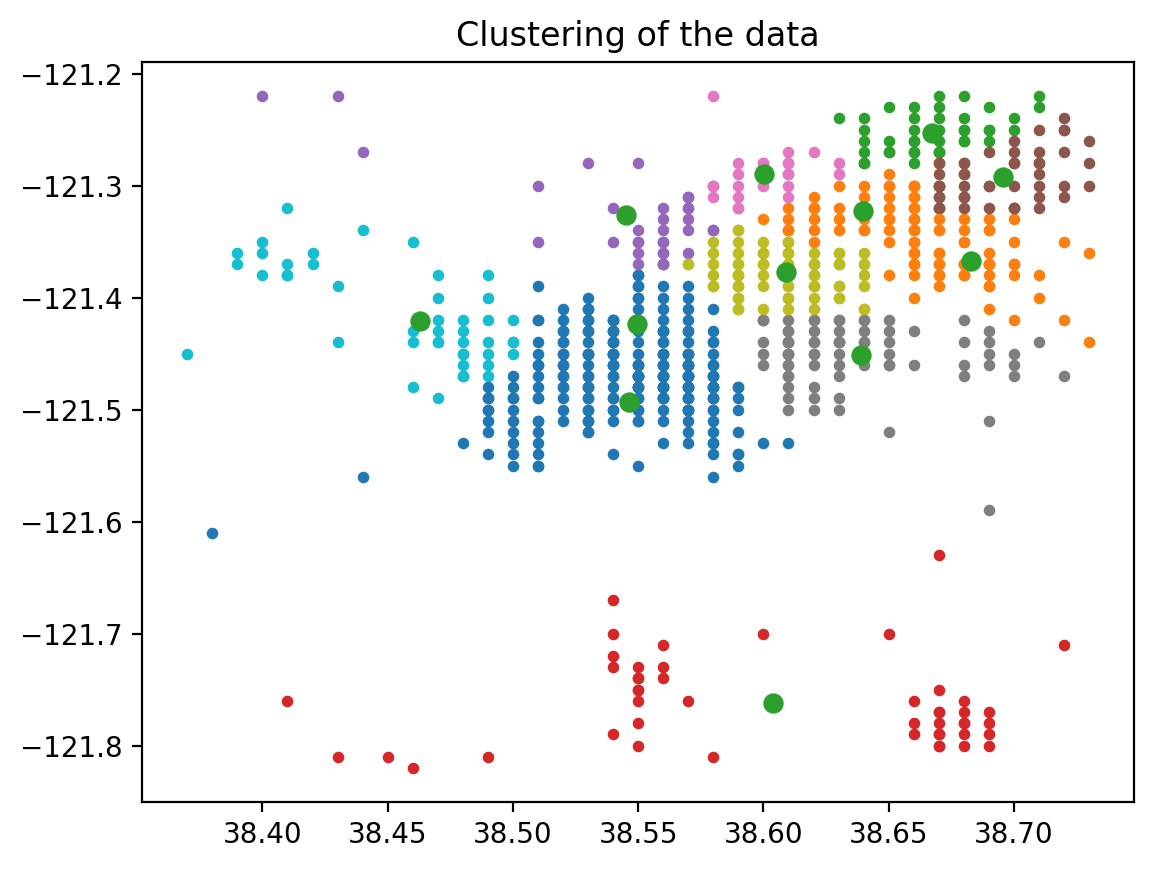

In [107]:
data = np.load("sacramento.npy")
lat_long = data[:, -2:]

# Plot function for three different values of p
print("----------------------p=1----------------------")
model = KMeans(n_clusters=12, p=1)
clusters = model.fit_predict(lat_long)
model.plot(lat_long, clusters)

print("----------------------p=2----------------------")
model = KMeans(n_clusters=12, p=2)
clusters = model.fit_predict(lat_long)
model.plot(lat_long, clusters)

print("----------------------p=inf----------------------")
model = KMeans(n_clusters=12, p=np.inf)
clusters = model.fit_predict(lat_long)
model.plot(lat_long, clusters)

I tested it on three different norms (the 1-norm, 2-norm, and infinity-norm). The 1-norm and 2-norm performed similarly. And, as expected the infinity orm seemed to keep the maximum distance the smallest (though it was a little hard to tell). This makes sense because the norm literally measures the distance to the farthest point.

## Problem 3

Add a keyword argument `normalize = False` to your `KMeans` constructor.
Modify `fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from raw data to spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates with `k=15`.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
Transform the cluster means back to latitude and longitude coordinates.
(Hint: use `np.arctan2()` for arctangent so that the correct quadrant is chosen)
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

In [13]:
data = np.load("earthquake_coordinates.npy")  # Load in data

# Convert to spherical
data_spherical = np.copy(data)
data_spherical[:, 1] = np.deg2rad(90 - data[:, 1])  # Shift latitude by 90
data_spherical[:, 0] = np.deg2rad(data[:, 0])
# data_spherical = np.deg2rad(data)  # Convert to radians
data_spherical = np.hstack((np.ones((len(data), 1)), data_spherical))  # Add radius column

# Extract data
r = data_spherical[:, 0]
theta = data_spherical[:, 1]
phi = data_spherical[:, 2]

# Convert to euclidean coordinates
data_euclidean = np.zeros_like(data_spherical)
data_euclidean[:, 0] = r*np.sin(phi)*np.cos(theta)  # x
data_euclidean[:, 1] = r*np.sin(phi)*np.sin(theta)  # y
data_euclidean[:, 2] = r*np.cos(phi)                # z

In [10]:
# Fit Kmeans on it
model = KMeans(n_clusters=15, normalize=True)
clusters = model.fit_predict(data_euclidean)
cluster_centers = model.cluster_centers

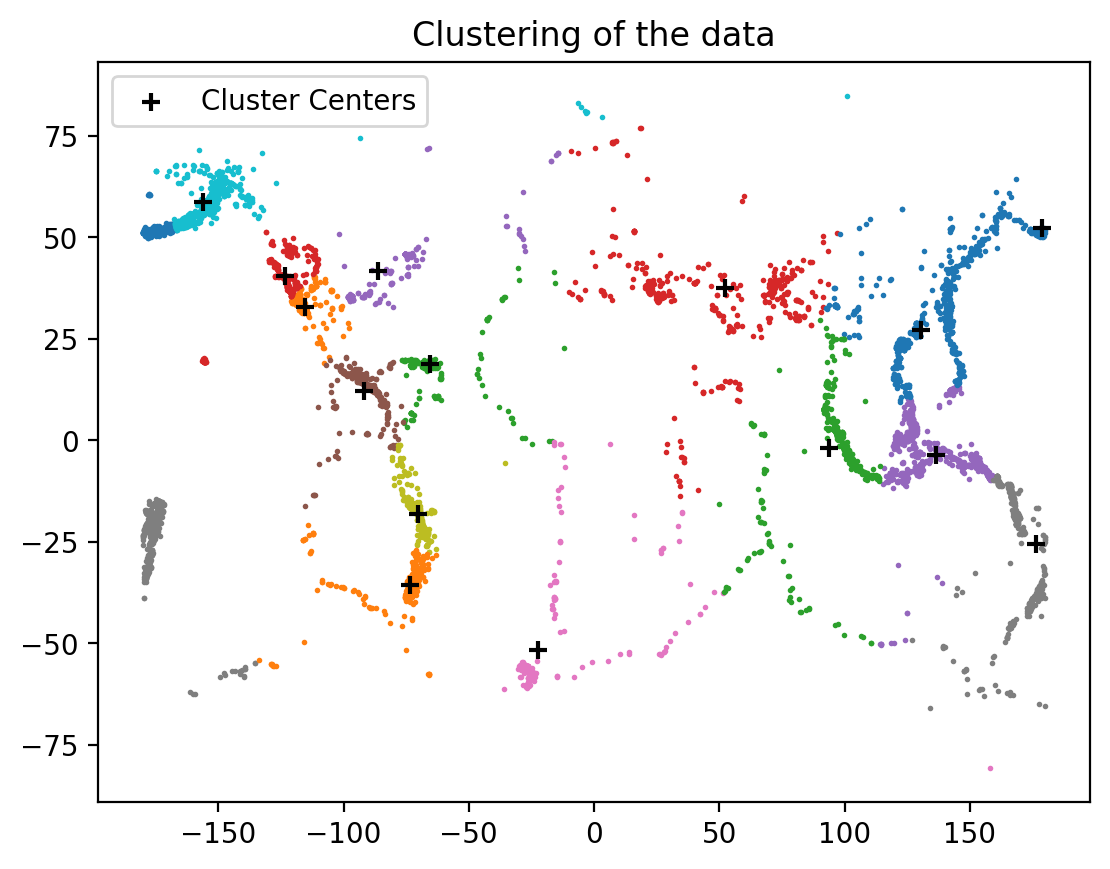

In [11]:
# Convert cluster centers back to longitude/latitude
x, y, z = cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2]
cluster_centers_lat_long = np.zeros((len(cluster_centers), 2))
cluster_centers_lat_long[:, 0] = np.arctan2(y, x)  # theta (longitude)
cluster_centers_lat_long[:, 1] = np.arccos(z)      # phi   (latitude)   # Don't need to divide by r since it is 1
cluster_centers_lat_long = np.rad2deg(cluster_centers_lat_long)   # Convert to degrees
longitude = cluster_centers_lat_long[:, 0]
latitude = cluster_centers_lat_long[:, 1]
latitude = 90 - latitude

# Plot it
plt.title("Clustering of the data")
classes = set(clusters)
for the_class in classes:
    indices = np.where(clusters==the_class)  # Find indices of each class
    x_data = data[indices]  # Get just the data that corresponds to that class
    plt.scatter(x_data[:,0], x_data[:,1], s=1)
plt.scatter(longitude, latitude, color="black", marker="+", s=40, label="Cluster Centers")
plt.legend()
plt.show()

# model.plot(data_euclidean, clusters)   # Verifies that it works on the other coordinate system

## Problem 4

Write a function that accepts an image array $\left(\text{of shape } (m,n,3)\right)$, an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class from Problem 1.

Test your function on the six provided NASA images.

In [363]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    im_reshaped = im.reshape(-1, 3) # Reshape
    # Sample n_samples of them
    samples = im_reshaped[np.random.choice(np.shape(im_reshaped)[0], n_samples, replace=False)]

    # Train k-means on the model
    model = cluster.KMeans(n_clusters=n_clusters)
    model.fit(samples)
    img_labels = model.predict(im_reshaped)
    cluster_centers = model.cluster_centers_
    
    # Generate new_image
    new_image = np.zeros_like(im_reshaped)  # Initialize as list of empty lists of correct size
    for the_class in range(n_clusters):
        indices = np.where(img_labels==the_class)[0]  # Find indices of each class
        new_image[indices] = cluster_centers[the_class]  # Get just the data that corresponds to that class
    
    # Reshape
    new_image = new_image.reshape(np.shape(im)[0], np.shape(im)[1], 3)
    
    return new_image

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


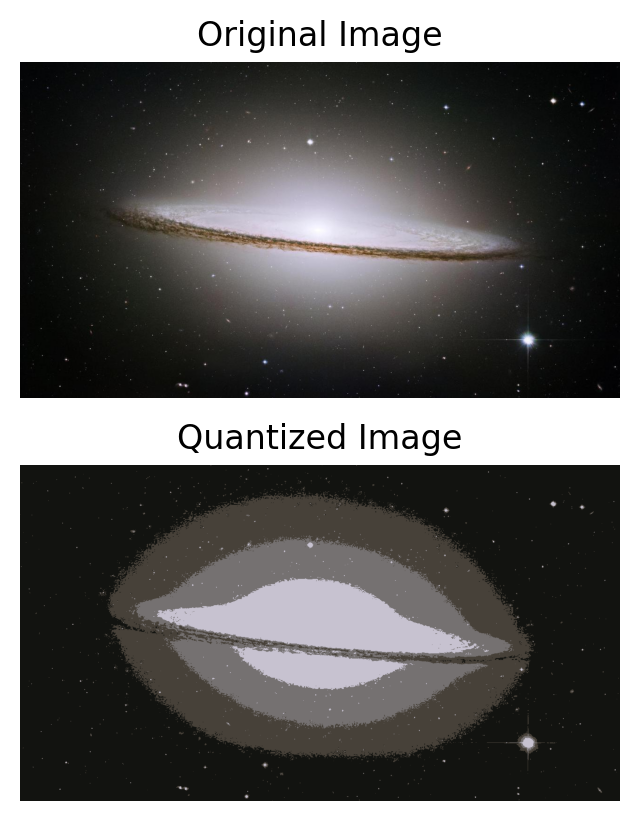

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


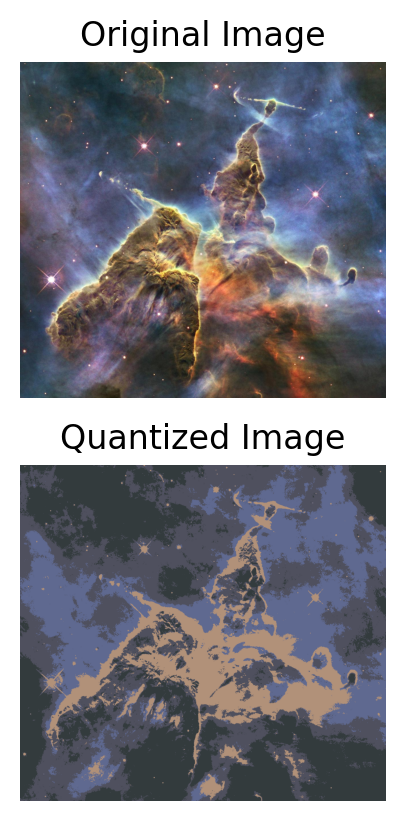

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


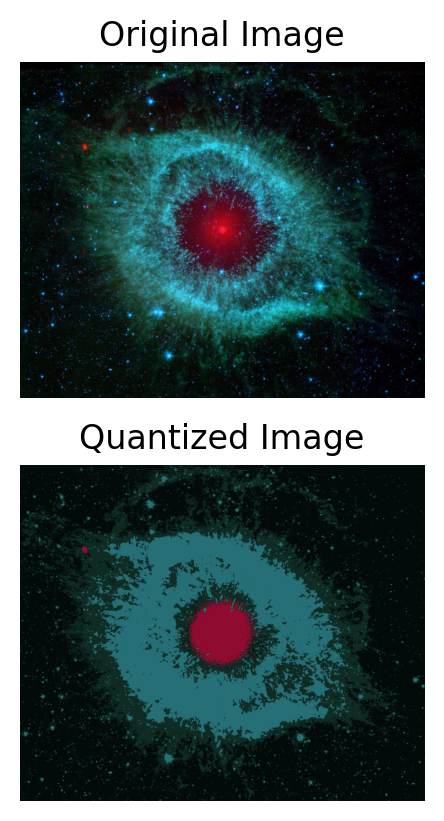

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


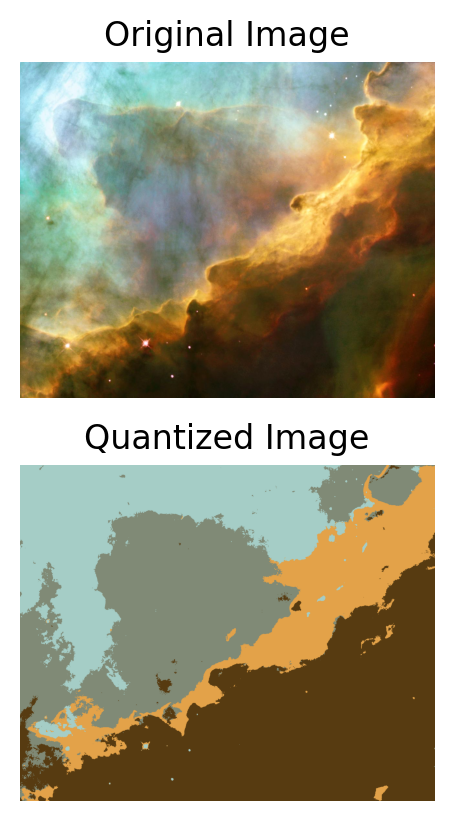

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


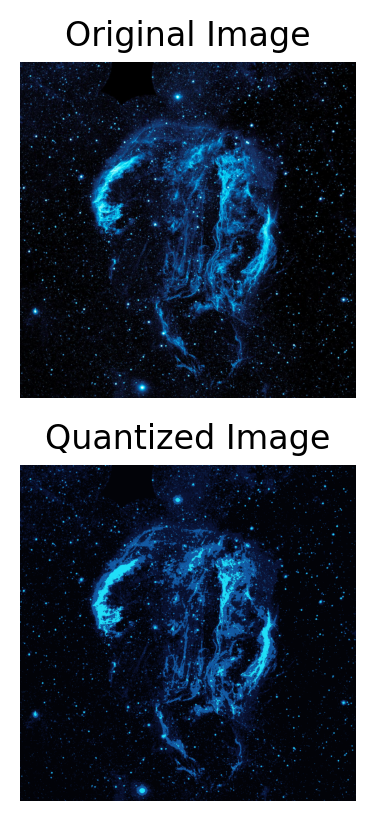

/home/dbp52/.acme-venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


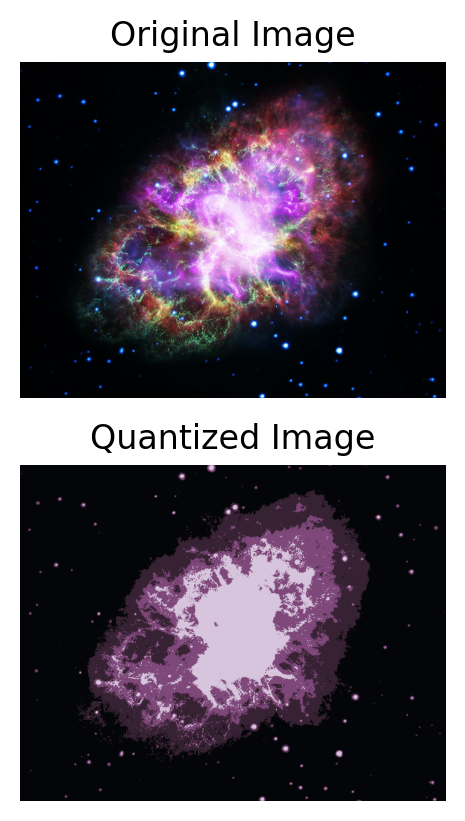

In [370]:
# Get the images
images = []  # List to store image arrays
for img_path in glob.glob("nasa/*.jpg" ):
    img = Image.open(img_path)   # Open image file
    images.append(np.array(img))  # Convert image to NumPy array and append to the list
# print(np.shape(images[0]))

# Plot the images
for i in range(len(images)):
    new_image = quantize_image(images[i])
    plt.subplot(211)
    plt.imshow(images[i])
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(212)
    plt.title("Quantized Image")
    plt.imshow(new_image)
    plt.axis("off")
    plt.show()